# AUTOMATIC TICKET ASSIGNMENT

### Milestone 1 : Data pre-processing and EDA

Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,scale

In [2]:
import os

In [4]:
data='DATA'
raw_data_folder='RAW_DATA'
processed_data_folder='PROCESSED_DATA'

In [5]:
if data not in os.listdir(os.getcwd()):
    os.makedirs(os.path.join(data))
DATA_PATH=os.path.join(data)
if raw_data_folder not in os.listdir(os.path.join(DATA_PATH)):
    os.makedirs(os.path.join(DATA_PATH,raw_data_folder))
RAW_DATA_PATH=os.path.join(DATA_PATH,raw_data_folder)
if processed_data_folder not in os.listdir(os.path.join(DATA_PATH)):
    os.makedirs(os.path.join(DATA_PATH,processed_data_folder))
PROCESSED_DATA_PATH=os.path.join(DATA_PATH,processed_data_folder)

Read the csv file and see some records

In [6]:
df=pd.read_csv(os.path.join(RAW_DATA_PATH,'Input Data Translated.csv'), encoding = 'latin-1')
df.head()

,Short description,Description,Caller,Assignment group,Lang_Short_Description,Lang_Description
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,en,en
1,outlook,\n\nreceived from: hmjdrvpb.komuaywn@gmail.com...,hmjdrvpb komuaywn,GRP_0,en,en
2,cant log in to vpn,\n\nreceived from: eylqgodm.ybqkwiam@gmail.com...,eylqgodm ybqkwiam,GRP_0,en,en
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,en,en
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,en,en


In [7]:
df.shape

(8500, 6)

There are 8500 rows and 4 columns

## EDA

Understanding of the columns is important in order to understand whether to retain/ drop some of them.

# Caller Column

This perhaps indicates the person who filed the ticket; it would be useful to understand the number of such callers (If there are many unique callers with low sample bases, then it might not make sense to include this column

In [104]:
new_df.Caller.nunique() # Understanding the unique no. of callers

2950

Thus across 8500 Rows, there are 2950 unique callers and hence each caller is unlikely to have a sufficient base for analysis. However would be interesting to check the counts of at least the callers who put in tickets more frequently

In [105]:
new_df.Caller.value_counts()

bpctwhsn kzqsbmtp    810
ZkBogxib QsEJzdZO    151
fumkcsji sarmtlhy    134
rbozivdq gmlhrtvp     87
rkupnshb gsmzfojw     71
jloygrwh acvztedi     64
spxqmiry zpwgoqju     63
oldrctiu bxurpsyi     57
olckhmvx pcqobjnd     54
dkmcfreg anwmfvlg     51
jyoqwxhz clhxsoqy     51
efbwiadp dicafxhv     45
afkstcev utbnkyop     32
gzhapcld fdigznbk     30
mnlazfsr mtqrkhnx     28
uvrbhlnt bjrmalzi     27
entuakhp xrnhtdmk     25
jionmpsf wnkpzcmv     24
vzqomdgt jwoqbuml     24
bozdftwx smylqejw     23
rxoynvgi ntgdsehl     21
qasdhyzm yuglsrwx     21
utyeofsk rdyzpwhi     21
vbwszcqn nlbqsuyv     19
ugyothfz ugrmkdhx     17
hbmwlprq ilfvyodx     17
vfrdxtqw jfbmsenz     16
niptbwdq csenjruz     16
pfzxecbo ptygkvzl     16
ughzilfm cfibdamq     16
                    ... 
zkhmvnib sugzyvhp      1
xaykwtrf amlswjfr      1
atdclmyi wqxzaysu      1
szcbhvwe edpouqjl      1
sagfvdeb kfqtvgxl      1
puxyqwjn zgmnsvjx      1
cwryvksu cedsairg      1
cvnzhbfa qcvzyrgo      1
suyighpt wifujdvq      1


There are only 11 callers who have a sample base > 50; While the top caller has 810 records, the sample per caller diminishes rapidly; thus there does not seem to be any value in retaining this column and it will be dropped 

Let's see the description

In [107]:
new_df.describe().transpose()

,count,unique,top,freq
Short description,8498,7386,password reset,48
Description,8497,7751,the,56
Caller,8500,2950,bpctwhsn kzqsbmtp,810
Assignment group,8500,74,GRP_0,3976
Language,8497,27,en,7733


Above description says below observations:
1. 'Short description' column has 2 blank values and 'Desciption' column has 3 blank values
2. Out of 8498 there are 7386 unique values in 'Short description' column, out of 8497 there are 7751 unique values in 'Description' column and out of 8500 there are 74 unique values in 'Assignment group' column which is target column. Also there are 27 unique languages in the database
3. "Password reset" is the top frequent value with 48 occurrences in 'Short description' column, "the" is the top frequent value with 56 occurrences in 'Description' column and "GRP_0" is the group which has maximum assignment of tickets i.e 3976. English is the most common language with 7733 records

Comments: In the Description Column 'the' by itself does not add any value since it would get removed as a stop word; hence useful to see what is Short Description that is in the rows with "the" in the Description Column

In [108]:
new_df[new_df.Description == 'the'].head(10)

,Short description,Description,Caller,Assignment group,Language
1049,reset passwords for soldfnbq uhnbsvqd using pa...,the,soldfnbq uhnbsvqd,GRP_17,en
1054,reset passwords for fygrwuna gomcekzi using pa...,the,fygrwuna gomcekzi,GRP_17,en
1144,reset passwords for wvdxnkhf jirecvta using pa...,the,wvdxnkhf jirecvta,GRP_17,en
1184,reset passwords for pxvjczdt kizsjfpq using pa...,the,pxvjczdt kizsjfpq,GRP_17,en
1292,reset passwords for cubdsrml znewqgop using pa...,the,cubdsrml znewqgop,GRP_17,en
1476,reset passwords for bnoupaki cpeioxdz using pa...,the,bnoupaki cpeioxdz,GRP_17,en
1558,reset passwords for usa feathers using passwor...,the,lmqysdec ljvbnpqw,GRP_17,en
1693,reset passwords for eglavnhx uprodleq using pa...,the,eglavnhx uprodleq,GRP_17,en
1834,reset passwords for hybiaxlk lawptzir using pa...,the,hybiaxlk lawptzir,GRP_17,en
1850,reset passwords for fylrosuk kedgmiul using pa...,the,fylrosuk kedgmiul,GRP_17,en


Most of the "the" in Description seem to be associated with "reset passwords" in the Short Description Column; thus in order to develop a reasonable model it points to the fact that it would be good to concatenate both these columns

Checking for the Data Types

In [109]:
new_df.dtypes

Short description    object
Description          object
Caller               object
Assignment group     object
Language             object
dtype: object

Let's see number of tickets assigned to each group

In [112]:
print(new_df['Assignment group'].value_counts())

GRP_0     3976
GRP_8      661
GRP_24     289
GRP_12     257
GRP_9      252
GRP_2      241
GRP_19     215
GRP_3      200
GRP_6      184
GRP_13     145
GRP_10     140
GRP_5      129
GRP_14     118
GRP_25     116
GRP_33     107
GRP_4      100
GRP_29      97
GRP_18      88
GRP_16      85
GRP_17      81
GRP_31      69
GRP_7       68
GRP_34      62
GRP_26      56
GRP_40      45
GRP_28      44
GRP_41      40
GRP_15      39
GRP_30      39
GRP_42      37
          ... 
GRP_44      15
GRP_36      15
GRP_50      14
GRP_53      11
GRP_65      11
GRP_52       9
GRP_55       8
GRP_51       8
GRP_59       6
GRP_49       6
GRP_46       6
GRP_43       5
GRP_32       4
GRP_66       4
GRP_38       3
GRP_56       3
GRP_58       3
GRP_68       3
GRP_63       3
GRP_54       2
GRP_72       2
GRP_71       2
GRP_57       2
GRP_69       2
GRP_73       1
GRP_61       1
GRP_67       1
GRP_64       1
GRP_70       1
GRP_35       1
Name: Assignment group, Length: 74, dtype: int64


The Group variable has a very long tail and it might not be beneficial to keep the ones that have a low record base; One could potentially club the groups with low record base into 1 group called as "Others". Classic statistics state that beyond a sample of 30, distributions tend to be normal and thus this value could be set as a cut-off for a group to be included and all groups with a base of <30 can be combined into "Others"

Let's check for null values

In [113]:
new_df.isnull().apply(pd.value_counts)  

,Short description,Description,Caller,Assignment group,Language
False,8498,8497,8500.0,8500.0,8497
True,2,3,NaN,NaN,3


There are 2 null values in 'Short description' column and 3 in 'Description' column.There is no null value in target column.

If there are rows, with Null values for both, then we would need to remove them; however we need to check for the same

In [114]:
# Let's look at the rows with null values
new_df[pd.isnull(new_df).any(axis=1)]

,Short description,Description,Caller,Assignment group,Language
2604,NaN,\n\nreceived from: ohdrnswl.rezuibdt@gmail.com...,ohdrnswl rezuibdt,GRP_34,en
3383,NaN,\n-connected to the user system using teamview...,qftpazns fxpnytmk,GRP_0,en
4395,i am locked out of skype,NaN,viyglzfo ajtfzpkb,GRP_0,NaN
6371,authorization add/delete members,NaN,hpmwliog kqtnfvrl,GRP_0,NaN
7397,browser issue :,NaN,fgejnhux fnkymoht,GRP_0,NaN


There are no records which have Null values for both Short Description and Description; Given that for prediction it is likely that both Columns would be used, replacement of Null values can be done with a blank string (as it is likely that both Short Description and Description would be concatenated while building the model)

In [115]:
# NULL replacement
new_df.fillna(str(), inplace=True)
new_df[pd.isnull(new_df).any(axis=1)]

,Short description,Description,Caller,Assignment group,Language


Now there is no null value in any column

Checking for Duplicates across Short Description and Description

In [116]:
df_common=new_df[new_df[["Short description","Description"]].apply(lambda x : x[0]==x[1],axis=1)].reset_index(drop=True).copy()

In [117]:
df_common.head()

,Short description,Description,Caller,Assignment group,Language
0,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,en
1,skype error,skype error,owlgqjme qhcozdfx,GRP_0,en
2,unable to log in to engineering tool and skype,unable to log in to engineering tool and skype,eflahbxn ltdgrvkz,GRP_0,en
3,ticket_no1550391- employment status - new non-...,ticket_no1550391- employment status - new non-...,eqzibjhw ymebpoih,GRP_0,en
4,unable to disable add ins on outlook,unable to disable add ins on outlook,mdbegvct dbvichlg,GRP_0,en


In [118]:
df_common.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2889 entries, 0 to 2888
Data columns (total 5 columns):
Short description    2889 non-null object
Description          2889 non-null object
Caller               2889 non-null object
Assignment group     2889 non-null object
Language             2889 non-null object
dtypes: object(5)
memory usage: 112.9+ KB


Comments: this shows that out of the 8500 records, 2889 have the same information in both Short description and Description - This would point out that it is better to concatenate the two columns for the modeling stage

Language as a column is not required for the modeling but was just for understanding; dropping the Language Column

In [119]:
new_df=new_df.drop('Language',axis=1)
new_df.shape
new_df.head()

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\n\nreceived from: hmjdrvpb.komuaywn@gmail.com...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\n\nreceived from: eylqgodm.ybqkwiam@gmail.com...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


# Data Understanding thus far

1. All text has been converted into English
2. Need to concatenate both the short Description and Description Columns
3. Long tails in "Assignment group" column need to be taken care of
4. Null values solved for by replacing with blank string
5. Need to remove email id's from text

# Next Steps

# Data Cleaning 

In this step there is a need to 
1. Convert all text to lower case
2. Remove numbers
3. Remove puntuations
4. Remove blank spaces
5. Remove stop words (along with other words identified earlier that would not contribute)
6. Remove email id's

In [120]:
import re # for applying Regex pattern to subject strings

In [121]:
# Fixing the different patterns
email_pat = r"([\w.+-]+@[a-z\d-]+\.[a-z\d.-]+)"
punct_pat = r"[,|.|_|@|\|?|\\|$&*|%|\r|\n|.:|\s+|/|//|\\|/|\||-|<|>|;|(|)|=|+|#|-|\"|[-\]]|{|}]"
num_pat = r"(?<!)(\d+(?:\.\d+)?)"

# Define a function to treat the texts
def preText(text):
    # Make the text unicase (lower) 
    text = str(text).lower()
    # Remove email adresses
    text = re.sub(email_pat, ' ', text, flags=re.IGNORECASE)
    # Remove all numbers
    text = re.sub(r'\d+',' ',text)# remove numbers
    text = re.sub(num_pat, ' ', text)
    # Replace all punctuations with blank space
    text = re.sub(r'[^\w\s]', ' ', text)
    text = re.sub(punct_pat, " ", text, flags=re.MULTILINE)
    text = re.sub(r'\s+', ' ', text)
    # remove HTML tags
    text = re.sub('<.*?>', '', text)   
    # Replace multiple spaces from prev step to single
    text = re.sub(r' {2,}', " ", text, flags=re.MULTILINE)
    text = text.replace('`',"'")
    return text.strip()

In [122]:
# Checking to see how the cleaning function has worked for a record
print('\033[1mOriginal text:\033[0m')
print(new_df['Description'][0])
print('_'*100)
print('\033[1mCleaned text:\033[0m')
print(preText(new_df['Description'][0]))

Original text:
-verified user details.(employee# & manager name)
-checked the user name in ad and reset the password.
-advised the user to login and check.
-caller confirmed that he was able to login.
-issue resolved.
____________________________________________________________________________________________________
Cleaned text:
verified user details employee manager name checked the user name in ad and reset the password advised the user to login and check caller confirmed that he was able to login issue resolved


Now given that The text seems to have been pre-processed correctly, applying it on the total database

In [123]:
new_df['Description'] = new_df['Description'].apply(preText)
new_df['Short description'] = new_df['Short description'].apply(preText)

# Verify the data
new_df.head()

,Short description,Description,Caller,Assignment group
0,login issue,verified user details employee manager name ch...,spxjnwir pjlcoqds,GRP_0
1,outlook,received from hello team my meetings skype mee...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,received from hi i cannot log on to vpn best,eylqgodm ybqkwiam,GRP_0
3,unable to access hr tool page,unable to access hr tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


# Text Pre Processing

As first steps, we would be concatenating Short Description and Description columns (given that more than a fourth of records have exactly the same data in both of them)

In [124]:
new_df.insert(loc=4, 
              column='Total', 
              allow_duplicates=True, 
              value=list(new_df['Short description'].str.strip() + ' ' + new_df['Description'].str.strip()))

In [125]:
new_df.head()

,Short description,Description,Caller,Assignment group,Total
0,login issue,verified user details employee manager name ch...,spxjnwir pjlcoqds,GRP_0,login issue verified user details employee man...
1,outlook,received from hello team my meetings skype mee...,hmjdrvpb komuaywn,GRP_0,outlook received from hello team my meetings s...
2,cant log in to vpn,received from hi i cannot log on to vpn best,eylqgodm ybqkwiam,GRP_0,cant log in to vpn received from hi i cannot l...
3,unable to access hr tool page,unable to access hr tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr tool page unable to access...
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error skype error


Comments: As seen in case 4, there is duplication and this needs to be removed

In [126]:
new_df["Total"] = new_df["Total"].apply(lambda x: ' '.join(pd.unique(x.split()))) # removing duplicates

In [127]:
new_df.head()

,Short description,Description,Caller,Assignment group,Total
0,login issue,verified user details employee manager name ch...,spxjnwir pjlcoqds,GRP_0,login issue verified user details employee man...
1,outlook,received from hello team my meetings skype mee...,hmjdrvpb komuaywn,GRP_0,outlook received from hello team my meetings s...
2,cant log in to vpn,received from hi i cannot log on to vpn best,eylqgodm ybqkwiam,GRP_0,cant log in to vpn received from hi i cannot o...
3,unable to access hr tool page,unable to access hr tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr tool page
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error


# Lemmatization

We are using spaCY for this given that it also takes of POS and works well on cleaned data

In [128]:
!pip install spacy

In [129]:
import spacy

In [130]:
import sys
!{sys.executable} -m spacy download en

[+] Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
[x] Couldn't link model to 'en'
Creating a symlink in spacy/data failed. Make sure you have the required
permissions and try re-running the command as admin, or use a virtualenv. You
can still import the model as a module and call its load() method, or create the
symlink manually.
C:\ProgramData\Anaconda3\lib\site-packages\en_core_web_sm -->
C:\ProgramData\Anaconda3\lib\site-packages\spacy\data\en
[!] Download successful but linking failed
Creating a shortcut link for 'en' didn't work (maybe you don't have admin
permissions?), but you can still load the model via its full package name: nlp =
spacy.load('en_core_web_sm')


You do not have sufficient privilege to perform this operation.


In [131]:
# Initialize spacy 'en' medium model, keeping only tagger component needed for lemmatization
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Define a function to lemmatize the descriptions
def lemmatizer(sentence):
    # Parse the sentence using the loaded 'en' model object `nlp`
    doc = nlp(sentence)
    return " ".join([token.lemma_ for token in doc if token.lemma_ !='-PRON-'])

In [132]:
# Checking to see how the lemmatizer function has worked for a record
print('\033[1mOriginal text:\033[0m')
print(new_df['Total'][0])
print('_'*100)
print('\033[1mLemmatized text:\033[0m')
print(lemmatizer(new_df['Total'][0]))

Original text:
login issue verified user details employee manager name checked the in ad and reset password advised to check caller confirmed that he was able resolved
____________________________________________________________________________________________________
Lemmatized text:
login issue verify user detail employee manager name check the in ad and reset password advise to check caller confirm that be able resolve


In [133]:
# Applying on the database
new_df['Total'] = new_df['Total'].apply(lemmatizer)

# Verify the data
new_df.head()

,Short description,Description,Caller,Assignment group,Total
0,login issue,verified user details employee manager name ch...,spxjnwir pjlcoqds,GRP_0,login issue verify user detail employee manage...
1,outlook,received from hello team my meetings skype mee...,hmjdrvpb komuaywn,GRP_0,outlook receive from hello team meeting skype ...
2,cant log in to vpn,received from hi i cannot log on to vpn best,eylqgodm ybqkwiam,GRP_0,can not log in to vpn receive from hi i can no...
3,unable to access hr tool page,unable to access hr tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr tool page
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error


# Preparing list of Stop words

In [134]:
!pip install nltk
import nltk as nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shiv\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [135]:
allstp=np.array(stopwords.words('english'))
allstp.size

179

In [136]:
#Creating an additional of stopwords that  we see as irrelevant to the modelling inputs
new_words=np.array(['yes','hi', 'receive','hello','sir','madam', 'best','morning','evening','afternoon' 'regards','thanks','from','greeting', 'forward','reply','will','please','see','help','able'])
new_words.size

20

In [137]:
stopwords=np.concatenate([allstp,new_words]) #Concatenating nltk list and our list of stopwords
stopwords.size

199

In [153]:
index_not = np.where(stopwords == 'not') # find index of 'not' in the stopwords
index_not

(array([118], dtype=int64),)

In [154]:
final_list=np.delete(stopwords, index_not)
final_list.size

198

In [155]:
#the cleaning process below removes the stopwords defined above as a string irrespective of whether it is part of another word. Example: it will remove "i" in input as "i" is a stopword. Hence, to prevent the same, we will append a space before and after every term to defined as a word
final_list1=[]
for i in final_list:
#     print("initial")
#     print(i)
    txt=i
    txt=" "+txt+" "
    i=txt
    final_list1.append(i)
#     print("final:")
#     print(i)
# final_list1

## Cleaning usernames and stop words from the descriptions

In [156]:
uniq=new_df['Caller'].unique()
print(uniq)
uniq.size

['spxjnwir pjlcoqds' 'hmjdrvpb komuaywn' 'eylqgodm ybqkwiam' ...
 'bjitvswa yrmugfnq' 'oybwdsgx oxyhwrfz' 'kqvbrspl jyzoklfx']


2950

In [ ]:
## We can use the same command for removing whatever stop words we want. Will append those terms to the uniq array using:
## np.append(uniq,stopword)

In [157]:
uniq1=np.concatenate([uniq,final_list1]) #preparing final list of terms that need to be deleted. This includes usernames and stopwords
uniq1.size

3148

In [158]:
new_df['Clean Description']=new_df['Total'].copy()

In [159]:
# print commands have been commented out due to issues in the IOrate. You can uncomment out the same in case you need the reference
s=" "
for key, value in new_df['Total'].iteritems():
    r=value
    
    if(pd.isnull(value)):
        s=''
    else:
#         print(key)
        for u in range(uniq1.size):
            if(r.find(uniq1[u])!=-1):
            
        #print(uniq[u])
#                 print('un found: ',uniq1[u])
                s = r.replace(uniq1[u],' ')
                r=s
#                 print('Key: ',key)
#                 print('Original string: ',r)
#                 print('Revised string: ',s)
            else:
                s=r
#     print(key)
#     print(r)
#     print(s)
    new_df.at[key,'Clean Description']= s
#     print(key)

In [160]:
new_df.head()

,Short description,Description,Caller,Assignment group,Total,Clean Description,Column B,Column C
0,login issue,verified user details employee manager name ch...,spxjnwir pjlcoqds,GRP_0,login issue verify user detail employee manage...,login issue verify user detail employee manage...,"(user, check, reset, caller, confirm, login, v...",10327
1,outlook,received from hello team my meetings skype mee...,hmjdrvpb komuaywn,GRP_0,outlook receive from hello team meeting skype ...,outlook team meeting skype etc not appear cale...,"(user, check, reset, caller, confirm, login, v...",10327
2,cant log in to vpn,received from hi i cannot log on to vpn best,eylqgodm ybqkwiam,GRP_0,can not log in to vpn receive from hi i can no...,can not log vpn not best,"(user, check, reset, caller, confirm, login, v...",10327
3,unable to access hr tool page,unable to access hr tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr tool page,unable access hr tool page,"(user, check, reset, caller, confirm, login, v...",10327
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error,skype error,"(user, check, reset, caller, confirm, login, v...",10327


Comments: Now the Column "Clean Description" has completely clean data where all the stop words, names of people removed and we can explore this data

# EDA on Description

Lets understand the total number of words in the corpus

In [161]:
cumulative_words = {}
cumulative_column = []

for x in new_df["Clean Description"].values:
    cumulative_words.update(dict.fromkeys(set(x.lower().split())))
    cumulative_column.append(cumulative_words.keys())

In [162]:
new_df["Column B"] = cumulative_column
new_df["Column C"] = new_df["Column B"].apply(len)

In [163]:
new_df.head()

,Short description,Description,Caller,Assignment group,Total,Clean Description,Column B,Column C
0,login issue,verified user details employee manager name ch...,spxjnwir pjlcoqds,GRP_0,login issue verify user detail employee manage...,login issue verify user detail employee manage...,"(user, check, reset, caller, confirm, login, v...",10327
1,outlook,received from hello team my meetings skype mee...,hmjdrvpb komuaywn,GRP_0,outlook receive from hello team meeting skype ...,outlook team meeting skype etc not appear cale...,"(user, check, reset, caller, confirm, login, v...",10327
2,cant log in to vpn,received from hi i cannot log on to vpn best,eylqgodm ybqkwiam,GRP_0,can not log in to vpn receive from hi i can no...,can not log vpn not best,"(user, check, reset, caller, confirm, login, v...",10327
3,unable to access hr tool page,unable to access hr tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr tool page,unable access hr tool page,"(user, check, reset, caller, confirm, login, v...",10327
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error,skype error,"(user, check, reset, caller, confirm, login, v...",10327


Comments: We have a total of 10327 unique words in our corpus

In [175]:
# Dropping the Column B & C
new_df=new_df.drop({'Column B','Column C'}, axis=1)
new_df.head()

#new_df=new_df.drop('Caller',axis=1)
#new_df.shape

,Short description,Description,Caller,Assignment group,Total,Clean Description,New grouping
0,login issue,verified user details employee manager name ch...,spxjnwir pjlcoqds,GRP_0,login issue verify user detail employee manage...,login issue verify user detail employee manage...,GRP_0
1,outlook,received from hello team my meetings skype mee...,hmjdrvpb komuaywn,GRP_0,outlook receive from hello team meeting skype ...,outlook team meeting skype etc not appear cale...,GRP_0
2,cant log in to vpn,received from hi i cannot log on to vpn best,eylqgodm ybqkwiam,GRP_0,can not log in to vpn receive from hi i can no...,can not log vpn not best,GRP_0
3,unable to access hr tool page,unable to access hr tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr tool page,unable access hr tool page,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error,skype error,GRP_0


# Understanding n-grams

In [149]:
pip install plotly==4.7.1

Note: you may need to restart the kernel to use updated packages.


In [150]:
pip install cufflinks

Note: you may need to restart the kernel to use updated packages.


In [151]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks
import plotly as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')

In [166]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(new_df['Clean Description'], 25)
for word, freq in common_words:
    print(word, freq)
df1 = pd.DataFrame(common_words, columns = ['Clean Description' , 'count'])
df1.groupby('Clean Description').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black',title='Top 25 Unigrams')

not 2297
password 1170
erp 1082
job 1035
tool 1021
issue 1015
scheduler 969
work 950
fail 936
reset 887
user 880
unable 880
sid 857
from 800
company 796
email 782
access 762
error 760
need 757
account 717
ticket 666
get 639
system 591
use 586
name 525


In [89]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(new_df['Clean Description'], 25)
for word, freq in common_words:
    print(word, freq)
df2 = pd.DataFrame(common_words, columns = ['Clean Description' , 'count'])
df2.groupby('Clean Description').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 25 bigrams')


fail scheduler 809
scheduler from 780
job fail 477
not work 414
password reset 354
erp sid 297
account lock 231
management tool 211
engineering tool 204
reset password 189
collaboration platform 186
internet explorer 184
error message 184
email customer 168
language browser 167
browser microsoft 167
customer number 167
telephone summary 167
microsoft internet 166
explorer email 166
password management 164
number telephone 158
job scheduler 157
ticket update 154
phone email 148


In [167]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(new_df['Clean Description'], 25)
for word, freq in common_words:
    print(word, freq)
df3 = pd.DataFrame(common_words, columns = ['Clean Description' , 'count'])
df3.groupby('Clean Description').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 25 trigrams')


fail scheduler from 780
job fail scheduler 471
browser microsoft internet 166
microsoft internet explorer 166
internet explorer email 165
language browser microsoft 164
email customer number 163
explorer email customer 162
password management tool 158
customer number telephone 157
number telephone summary 154
abended job scheduler 147
specify top cert 143
contact notify phone 143
notify phone email 143
remote dial equipment 143
dial equipment reset 143
equipment reset verify 143
gsc start additional 142
start additional diagnostic 142
start schedule maintenance 141
provider maint ticket 141
phone email remote 141
email remote dial 141
reset verify work 141


Understanding whether the length of the ticket has an implication on the group it belongs to

In [179]:
#creating a column for determining word count
new_df['word_count'] = new_df['Clean Description'].str.split().map(len)

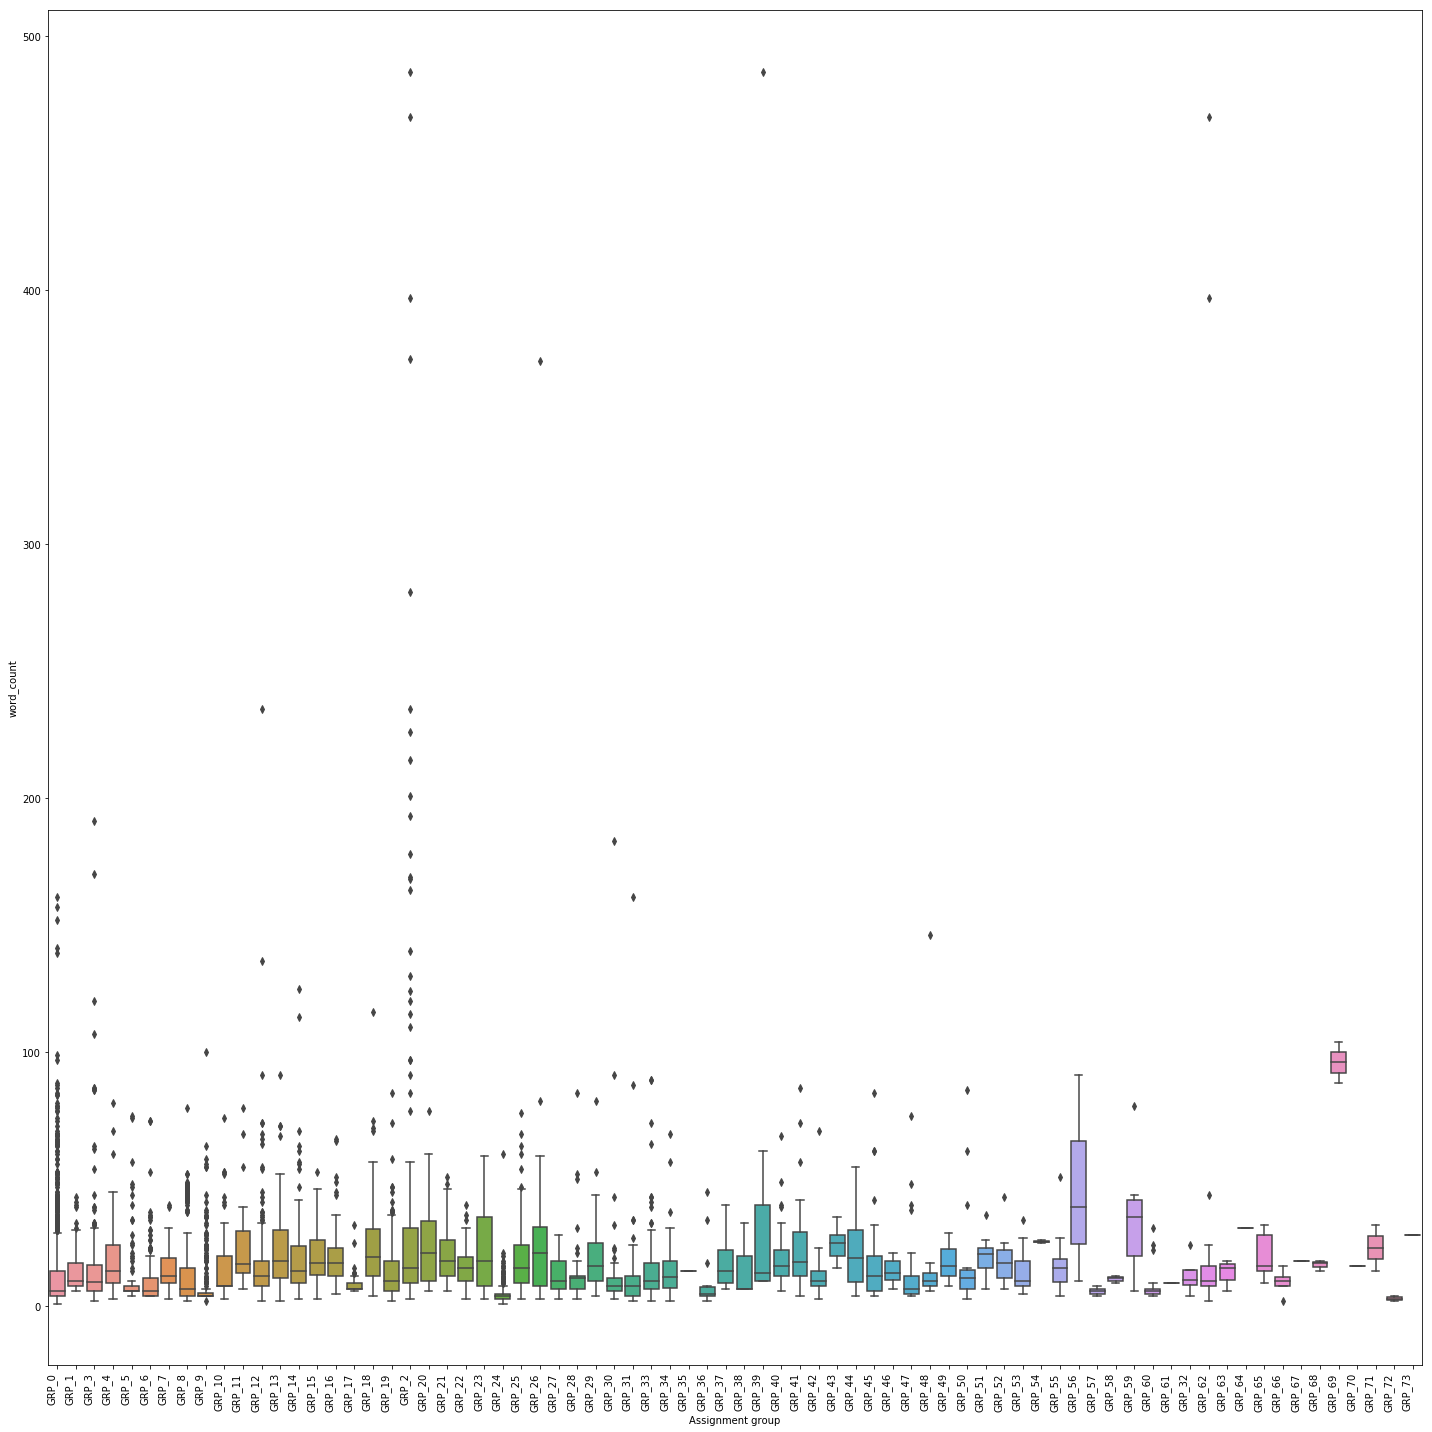

In [191]:
fig_dims = (20, 20)
fig, ax = plt.subplots(figsize=fig_dims)
chart=sns.boxplot(x="Assignment group", y="word_count",ax=ax, data=new_df) 
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

Excepting for some groups like group 56 & 70 that stand out in terms of the large no. of words used, difficult to see a pattern emerging across other groups

# Combining Assignment Groups

We had earlier mentioned that a lof assignment groups had very less records and thus we would need to combine all such groups into a "Other" Group.

In [192]:
new_df['New grouping']=new_df['Assignment group'].copy()

In [193]:
cols = ['New grouping']
for col in cols:
    val = new_df[col].value_counts()
    y = val[val < 30].index # all groups with less than 30 records will be combined into others
    new_df[col] = new_df[col].replace({x:'other' for x in y})

In [201]:
new_df.head()

,Short description,Description,Caller,Assignment group,Total,Clean Description,New grouping,word_count
0,login issue,verified user details employee manager name ch...,spxjnwir pjlcoqds,GRP_0,login issue verify user detail employee manage...,login issue verify user detail employee manage...,GRP_0,17
1,outlook,received from hello team my meetings skype mee...,hmjdrvpb komuaywn,GRP_0,outlook receive from hello team meeting skype ...,outlook team meeting skype etc not appear cale...,GRP_0,12
2,cant log in to vpn,received from hi i cannot log on to vpn best,eylqgodm ybqkwiam,GRP_0,can not log in to vpn receive from hi i can no...,can not log vpn not best,GRP_0,6
3,unable to access hr tool page,unable to access hr tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr tool page,unable access hr tool page,GRP_0,5
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error,skype error,GRP_0,2


In [202]:
new_df['New grouping'].value_counts()

GRP_0     3976
GRP_8      661
other      357
GRP_24     289
GRP_12     257
GRP_9      252
GRP_2      241
GRP_19     215
GRP_3      200
GRP_6      184
GRP_13     145
GRP_10     140
GRP_5      129
GRP_14     118
GRP_25     116
GRP_33     107
GRP_4      100
GRP_29      97
GRP_18      88
GRP_16      85
GRP_17      81
GRP_31      69
GRP_7       68
GRP_34      62
GRP_26      56
GRP_40      45
GRP_28      44
GRP_41      40
GRP_30      39
GRP_15      39
GRP_42      37
GRP_20      36
GRP_45      35
GRP_22      31
GRP_1       31
GRP_11      30
Name: New grouping, dtype: int64

Thus Now from the earlier 74 groups, we now have only 36 groups - with a group called as "others". While the groups are quite unbalanced in terms of no. of records in each group, at this stage, we would not be undertaking any balancing exercise but check the accuracies of the models and of required at the next stage try and balance the groups.

# Initial Modeling

This is meant to be a trial run of an initial model to understand likely accuracies. At this stage, we have two columns of interest, "Clean Description" and "New grouping". A new dataframe will be created using only these two columns and a trial model would be run

In [203]:
model_df = new_df[{'Clean Description','New grouping'}]

In [204]:
model_df.head()

,Clean Description,New grouping
0,login issue verify user detail employee manage...,GRP_0
1,outlook team meeting skype etc not appear cale...,GRP_0
2,can not log vpn not best,GRP_0
3,unable access hr tool page,GRP_0
4,skype error,GRP_0


In [205]:
model_df.shape

(8500, 2)

In [206]:
model_df.describe().transpose()

,count,unique,top,freq
Clean Description,8500,6634,job fail scheduler from,445
New grouping,8500,36,GRP_0,3976


## Get the Length of each line and find the maximum length. ( 4 marks)
As different lines are of different length. We need to pad the our sequences using the max length.

In [207]:
#creating a column for determining word count
model_df['word_count'] = model_df['Clean Description'].str.split().map(len)

In [208]:
model_df.head()

,Clean Description,New grouping,word_count
0,login issue verify user detail employee manage...,GRP_0,17
1,outlook team meeting skype etc not appear cale...,GRP_0,12
2,can not log vpn not best,GRP_0,6
3,unable access hr tool page,GRP_0,5
4,skype error,GRP_0,2


In [209]:
# understanding the max no. of words
max (model_df['word_count'])

486

Thus the maximum no. of words is 486

In [210]:
np.mean (model_df['word_count'])

13.77070588235294

In [211]:
np.std (model_df['word_count'])

20.593414440671673

Given that the average no. of words is ~ 14 and standard deviation is ~21, we could safely fix the max number of words at 100 without too much loss in data

## Import required modules required for modelling.

In [212]:
# Utilities

import os, zipfile, sys, warnings
from time import time
import cv2
import tensorflow as tf
from tensorflow import keras

# Numerical calculation
import numpy as np

# Data Handling
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import *
from keras.utils.np_utils import to_categorical
from keras.initializers import Constant
import re


# Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# Sequential Modeling
import keras.backend as K
from keras import initializers
from keras.engine.topology import Layer, InputSpec
from keras.models import Model, Sequential
from keras.layers import Dense, LSTM, TimeDistributed, Conv1D, MaxPooling1D
from keras.layers import Embedding, Activation, Dropout, Flatten, Bidirectional
from keras.layers import Permute, merge, Input, multiply, concatenate
from keras.callbacks import Callback, ModelCheckpoint, EarlyStopping
from keras.constraints import max_norm, unit_norm

# Preprocessing and NLP library
from keras.preprocessing.text import Tokenizer, text_to_word_sequence
from keras.preprocessing.sequence import pad_sequences
import nltk

# Evaluation metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, accuracy_score, precision_recall_curve

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:72: UserWarning:

h5py is running against HDF5 1.10.2 when it was built against 1.10.3, this may cause problems

Using TensorFlow backend.


# Set Different Parameters for the model. 

In [213]:
max_features = 10000
maxlen = 100
embedding_size = 200

## Apply Keras Tokenizer of headline column of your data. 
First creating a tokenizer instance using Tokenizer(num_words=max_features) 
And then fit this tokenizer instance on your data column model_df['Clean Description'] using .fit_on_texts()

In [214]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shiv\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [215]:
tokenizer = Tokenizer(num_words=max_features,filters= '!"#$%&()*+,-./:;<=>?@[\]^_`{|}\n“~”')

In [216]:
tokenizer.fit_on_texts(model_df['Clean Description'])

# Defining X and y for the model.

In [217]:
# First to Create a target categorical column
model_df['New grouping'] = model_df['New grouping'].astype('category').cat.codes
model_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 3 columns):
Clean Description    8500 non-null object
New grouping         8500 non-null int8
word_count           8500 non-null int64
dtypes: int64(1), int8(1), object(1)
memory usage: 141.2+ KB


In [218]:
model_df.head()

,Clean Description,New grouping,word_count
0,login issue verify user detail employee manage...,0,17
1,outlook team meeting skype etc not appear cale...,0,12
2,can not log vpn not best,0,6
3,unable access hr tool page,0,5
4,skype error,0,2


In [219]:
X = tokenizer.texts_to_sequences(model_df['Clean Description'])
X = pad_sequences(X, maxlen = maxlen)
y = np.asarray(model_df['New grouping'])

print("Number of Samples:", len(X))
print(X[0])
print("Number of Labels: ", len(y))
print(y[0])

Number of Samples: 8500
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0  30   6 102  11  89 129  59
  25  32 207  10   2 161  32 257 142  78]
Number of Labels:  8500
0


## Get the Vocabulary size 
Use tokenizer.word_index.

In [220]:
vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary size: %d\nDocuments count: %d' % (vocab_size, tokenizer.document_count))

Vocabulary size: 10328
Documents count: 8500


Note:

That + 1 is because of reserving padding (i.e. index zero).

## Get Glove Word Embeddings

In [221]:
glove_file = "glove.6B.zip"

In [222]:
#Extract Glove embedding zip file
from zipfile import ZipFile
with ZipFile(glove_file, 'r') as z:
  z.extractall()

# Get the Word Embeddings using Embedding file and creating a weight matrix for words in training docs

In [223]:
# load the whole embedding into memory
embeddings_index = dict()
f = open('glove.6B.200d.txt', encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))

# create a weight matrix for words in training docs
embedding_matrix = np.zeros((vocab_size, 200))


for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
        

Loaded 400000 word vectors.


# Splitting the data into training and validation samples

In [224]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1, stratify=y)

## Create and Compile your Model
Usinga  Sequential model instance and then add Embedding layer, Bidirectional(LSTM) layer, then dense and dropout layers as required. 
In the end add a final dense layer with sigmoid activation for binary classification.


In [228]:
# Build the model
embedding_dim = 200

model = Sequential()
model.add(Embedding(vocab_size,
                    embedding_dim,
                    embeddings_initializer=Constant(embedding_matrix),
                    input_length=maxlen,
                    trainable=True))
model.add(SpatialDropout1D(0.2))
model.add(Bidirectional(CuDNNLSTM(128, return_sequences=True)))
model.add(Bidirectional(CuDNNLSTM(64, return_sequences=True)))
model.add(Bidirectional(CuDNNLSTM(32)))
model.add(Dropout(0.25))
model.add(Dense(units=36, activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 100, 200)          2065600   
_________________________________________________________________
spatial_dropout1d_4 (Spatial (None, 100, 200)          0         
_________________________________________________________________
bidirectional_8 (Bidirection (None, 100, 256)          337920    
_________________________________________________________________
bidirectional_9 (Bidirection (None, 100, 128)          164864    
_________________________________________________________________
bidirectional_10 (Bidirectio (None, 64)                41472     
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 36)               

# Fitting the model with a batch size of 100 and validation_split = 0.2.

In [229]:
# Converting to categorical data
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [230]:
batch_size = 100
epochs = 20
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1, validation_split=0.2)


Train on 5440 samples, validate on 1360 samples
Epoch 1/20
5440/5440 [==============================] - 12s 2ms/step - loss: 2.5013 - accuracy: 0.4765 - val_loss: 2.1377 - val_accuracy: 0.5338
Epoch 2/20
5440/5440 [==============================] - 9s 2ms/step - loss: 2.0657 - accuracy: 0.5369 - val_loss: 1.9659 - val_accuracy: 0.5375
Epoch 3/20
5440/5440 [==============================] - 16s 3ms/step - loss: 1.8893 - accuracy: 0.5474 - val_loss: 1.8339 - val_accuracy: 0.5610
Epoch 4/20
5440/5440 [==============================] - 23s 4ms/step - loss: 1.7704 - accuracy: 0.5647 - val_loss: 1.7730 - val_accuracy: 0.5662
Epoch 5/20
5440/5440 [==============================] - 32s 6ms/step - loss: 1.6677 - accuracy: 0.5785 - val_loss: 1.7122 - val_accuracy: 0.5721
Epoch 6/20
5440/5440 [==============================] - 39s 7ms/step - loss: 1.5626 - accuracy: 0.5976 - val_loss: 1.6813 - val_accuracy: 0.5801
Epoch 7/20
5440/5440 [==============================] - 39s 7ms/step - loss: 1.475

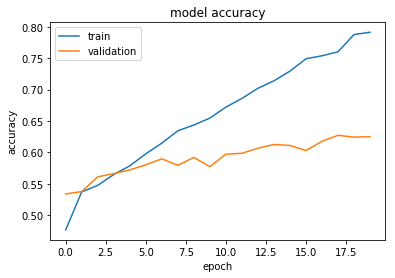

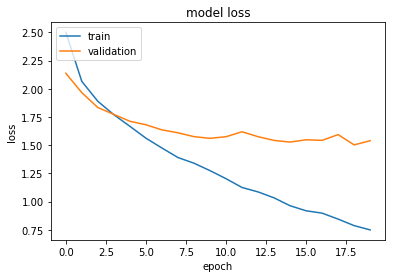

In [231]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Model clearly overfits, on validation data it has an accuracy of only  ~ 63% whereas train accuracy is 75%

## Prediction on Test Data

In [232]:
# Generic method to print the classification report
def classification_summary(y_test, y_pred, y_proba):
    print('\033[1mModel accuracy:\033[0m %.2f%%' % (accuracy_score(y_test, y_pred) * 100))
    print('_'*80)
    print('\033[1mConfusion matrix:\033[0m\n %s' % (confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))))
    print('_'*80)
    print('\033[1mClassification report:\033[0m\n %s' % (classification_report(y_test, y_pred)))
    print('_'*80)

In [233]:
# Analyze Classification Summary
y_proba = model.predict([X_test])
y_pred = (y_proba > 0.5).astype('int32')
classification_summary(y_test, y_pred, y_proba)

Model accuracy: 53.59%
________________________________________________________________________________
Confusion matrix:
 [[766   0   1 ...   0   0   7]
 [  2   0   0 ...   0   0   0]
 [ 13   0  13 ...   0   0   1]
 ...
 [ 49   0   1 ...  70   0   0]
 [ 48   0   0 ...   0   0   2]
 [ 56   0   0 ...   3   0   7]]
________________________________________________________________________________
Classification report:
               precision    recall  f1-score   support

           0       0.83      0.84      0.83       795
           1       0.00      0.00      0.00         6
           2       0.57      0.46      0.51        28
           3       0.00      0.00      0.00         6
           4       0.65      0.51      0.57        51
           5       0.52      0.38      0.44        29
           6       0.69      0.38      0.49        24
           7       0.00      0.00      0.00         8
           8       0.00      0.00      0.00        17
           9       1.00      0.81      

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.



For the smaller groups, the accuracy is really low; we can potentially think of merging groups with a record base of less than 50 (instead of 30)

# Instead of Glove using Word2Vec

Perhaps more appropriate in this situation since quite a few of the words like http, vpn, etc might not be present in the Glove Vocabulary and thus creating a vocabulary for this specific study might be better

In [260]:
!pip install gensim

  Stored in directory: C:\Users\shiv\AppData\Local\pip\Cache\wheels\27\65\38\8d7f5fe8d7afb4e4566587b2d1933cec185fba19257836c943
Successfully built smart-open
  Found existing installation: Cython 0.29.6
    Uninstalling Cython-0.29.6:
      Successfully uninstalled Cython-0.29.6


In [261]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.parsing import preprocessing
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from gensim.models.phrases import Phraser
from gensim.models import Phrases, CoherenceModel

### Thematic analysis of data

In [263]:
df_theme=new_df.copy()

In [264]:
df_theme.head(5)

,Short description,Description,Caller,Assignment group,Total,Clean Description,New grouping
0,login issue,verified user details employee manager name ch...,spxjnwir pjlcoqds,GRP_0,login issue verify user detail employee manage...,login issue verify user detail employee manage...,GRP_0
1,outlook,received from hello team my meetings skype mee...,hmjdrvpb komuaywn,GRP_0,outlook receive from hello team meeting skype ...,outlook team meeting skype etc not appear cale...,GRP_0
2,cant log in to vpn,received from hi i cannot log on to vpn best,eylqgodm ybqkwiam,GRP_0,can not log in to vpn receive from hi i can no...,can not log vpn not best,GRP_0
3,unable to access hr tool page,unable to access hr tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr tool page,unable access hr tool page,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error,skype error,GRP_0


In [265]:
corpus_text = '\n'.join(df_theme[:]['Clean Description'])
sentences = corpus_text.split('\n')
sentences = [line.lower().split(' ') for line in sentences]

In [266]:
sentences[5]

['unable', 'log', 'engineering', 'tool', 'skype']

In [267]:
def clean(s): #removing additional punctuation
    return [w.strip(',."!?:;()\'') for w in s]
sentences = [clean(s) for s in sentences if len(s) > 0]

In [281]:
from gensim.models import Word2Vec

model = Word2Vec(sentences, size=8000, window=3, min_count=3, workers=4) #Tried a size of 100, 1000 and 2000 but the similarity qualitatively did not seem all that good
model.save("word2vec.mdl")

In [269]:
vectors = model.wv #keeping only the vector values
len(model.wv.vocab)

3135

In [270]:
print(vectors.similarity('access', 'login')) #taking sample value and analysing the relationships
print(vectors.similarity('access', 'skype'))

0.91378766
0.9864943


In [271]:
vectors.most_similar('vpn')

[('connect', 0.9780881404876709),
 ('collaboration', 0.9752592444419861),
 ('platform', 0.9695403575897217),
 ('tologin', 0.9675502777099609),
 ('khrtyujuine', 0.9626268744468689),
 ('can', 0.9617358446121216),
 ('sync', 0.9580341577529907),
 ('access', 0.9579378366470337),
 ('skype', 0.9573770761489868),
 ('engineering', 0.9566475749015808)]

So we can see strong connects with <b>into</b>, <b>sign</b>, <b>access</b>,<b>log</b>  - words which are typically used for a connectivity session which is what a VPN is used for. This implies that our vectors seem to be defined well

In [272]:
term = ['reset','account']
for i in term:
    print('\n')
    print('For term: \033[1m',i,'\033[0m the most similar words are:')
    for word, similarity in model.most_similar(positive=i, topn=10): #Identifying similar words
            print (word, round(similarity, 4))



For term:  reset  the most similar words are:
password 0.9699
user 0.9552
login 0.9514
passwords 0.948
management 0.9443
windows 0.943
pwd 0.9323
unlocked 0.9321
use 0.9316
manager 0.9308


For term:  account  the most similar words are:
unlock 0.9979
lock 0.9954
erp 0.9919
ad 0.973
unlocked 0.9721
windows 0.9713
system 0.9599
haunm 0.9597
pasword 0.9554
pwd 0.9544


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """


However as expected, <b>pwd</b>, <b>'password'</b>, <b>'passwords'</b>, <b>'verify'</b> in the top 10 words similar to <b>'reset'</b>.Ironically, <b>'manager'</b> is also part of the list. This can be explained by the fact, that of the 476 tickets that contain <b>'reset'</b>, 55 of them also have the word <b>'manager'</b>(11.5%). 

Similarly, for <b>account</b>, the highest ranking words are <b>unlock</b> and <b>lock</b> apart from <b>erp </b> and <b>windows</b> which are systems that are account-controlled

In [273]:
ordered_vocab = [(term, voc.index, voc.count) for term, voc in model.wv.vocab.items()]
ordered_vocab = sorted(ordered_vocab, key=lambda k: -k[2])
ordered_terms, term_indices, term_counts = zip(*ordered_vocab)
# print(ordered_terms)
# create a DataFrame with the vectors as data,
# and the terms as row labels
word_vectors = pd.DataFrame(model.wv.syn0norm[term_indices, :], index=ordered_terms)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `syn0norm` (Attribute will be removed in 4.0.0, use self.vectors_norm instead).
  import sys


In [274]:
word_vectors

,0,1,2,3,4,5,6,7,8,9,...,7990,7991,7992,7993,7994,7995,7996,7997,7998,7999
,0.010920,-0.015687,-0.001783,-0.000403,0.006413,-0.006828,-0.010189,0.023540,-0.005165,-0.015204,...,0.005670,0.011480,0.007583,-0.004013,-0.002705,-0.008234,0.002311,0.016836,0.009785,-0.005525
not,0.015736,-0.010790,0.000101,0.006203,-0.003666,-0.018243,-0.017409,0.028857,0.004644,-0.022141,...,0.003205,-0.006076,0.019945,-0.009934,0.000857,-0.004490,0.003324,0.010953,0.005870,-0.007720
password,0.013606,-0.009779,-0.006441,0.005316,-0.002068,-0.020070,-0.012629,0.023219,-0.003234,-0.020001,...,0.003830,0.003747,0.013527,-0.004264,0.000180,-0.006965,-0.002277,0.010089,0.008984,-0.005761
erp,0.015552,-0.007558,-0.003524,0.007158,-0.008652,-0.017091,-0.011709,0.025378,-0.001648,-0.015725,...,0.006512,-0.005691,0.020924,-0.010905,0.003903,-0.008280,-0.001999,0.010555,0.008237,-0.007769
job,0.019201,-0.003413,0.000356,0.009801,-0.010739,-0.001276,-0.007831,0.024045,0.006138,0.003692,...,0.007884,-0.020107,0.026945,-0.015442,0.012187,-0.004883,0.006984,0.008468,-0.004844,-0.004291
tool,0.019768,-0.011661,0.002929,0.009314,-0.007545,-0.015586,-0.012077,0.029238,0.002615,-0.017398,...,0.002454,-0.005662,0.016696,-0.015726,0.001742,-0.009760,-0.003365,0.009679,0.008053,-0.014800
issue,0.016079,-0.010681,0.000359,0.006820,-0.004187,-0.014994,-0.015921,0.028925,0.003370,-0.019710,...,0.002696,-0.007271,0.020767,-0.010270,0.002387,-0.004984,0.003727,0.012692,0.005989,-0.007672
scheduler,0.019583,-0.003784,0.000058,0.009761,-0.010587,-0.001732,-0.008273,0.024455,0.006284,0.003347,...,0.007967,-0.020158,0.027166,-0.015019,0.012451,-0.004567,0.007170,0.008625,-0.004975,-0.004171
work,0.016963,-0.007242,-0.015408,0.007706,0.000024,-0.025655,-0.020185,0.024464,0.002677,-0.015774,...,0.008121,-0.000335,0.021359,0.002803,0.006129,0.000255,0.006955,0.006020,-0.002470,0.003522
fail,0.019030,-0.003291,0.000140,0.009962,-0.010637,-0.001280,-0.007891,0.023955,0.006582,0.003911,...,0.007836,-0.020266,0.027090,-0.015094,0.012286,-0.004800,0.007392,0.008437,-0.005383,-0.003879


In [275]:
from sklearn.manifold import TSNE
tsne_input = word_vectors

In [276]:
tsne = TSNE()
tsne_vectors = tsne.fit_transform(tsne_input.values)

In [277]:
tsne_vectors

array([[-77.30749  ,  -3.0828352],
       [-73.649376 , -17.936193 ],
       [-78.73836  , -23.170765 ],
       ...,
       [-41.374584 ,  26.841705 ],
       [ -0.6887137,  13.049257 ],
       [-61.09315  ,  -1.040639 ]], dtype=float32)

In [278]:
tsne_vectors1 = pd.DataFrame(tsne_vectors,
                            index=pd.Index(tsne_input.index),
                            columns=['x_coord', 'y_coord'])
tsne_vectors1['word'] = tsne_vectors1.index

In [279]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import HoverTool, ColumnDataSource, value

output_notebook()

Loading BokehJS ...

In [280]:
# add our DataFrame as a ColumnDataSource for Bokeh
plot_data = ColumnDataSource(tsne_vectors1)

# create the plot and configure the
# title, dimensions, and tools
tsne_plot = figure(title='t-SNE Word Embeddings',
                   plot_width = 800,
                   plot_height = 800,
                   tools= ('pan, wheel_zoom, box_zoom,'
                           'box_select, reset'),
                   active_scroll='wheel_zoom')
tsne_plot.add_tools( HoverTool(tooltips = '@word') )
# draw the words as circles on the plot
tsne_plot.circle('x_coord', 'y_coord', source=plot_data,
                 color='blue', line_alpha=0.2, fill_alpha=0.1,
                 size=10, hover_line_color='black')

# configure visual elements of the plot
tsne_plot.title.text_font_size = value(u'16pt')
tsne_plot.xaxis.visible = False
tsne_plot.yaxis.visible = False
tsne_plot.grid.grid_line_color = None
tsne_plot.outline_line_color = None

# engage!
show(tsne_plot);

# Modeling with Word2Vec

In [282]:
# Load the Word2Vec model
wmodel = Doc2Vec.load('word2vec.mdl')

In [283]:
w2v_weights = wmodel.wv.vectors
vocab_size, embedding_size = w2v_weights.shape
print("Vocabulary Size: {} - Embedding Dim: {}".format(vocab_size, embedding_size))

Vocabulary Size: 3135 - Embedding Dim: 8000


In [286]:
# CREATE the MODEL

# Samples of categories with less than this number of samples will be ignored
DROP_THRESHOLD = 10000
model_wv = Sequential()
model_wv.add(Embedding(input_dim=vocab_size, 
                        output_dim=embedding_size, 
                        weights=[w2v_weights], 
                        input_length=maxlen, 
                        mask_zero=True,
                        trainable=False))
model_wv.add(SpatialDropout1D(0.2))
model_wv.add(Bidirectional(LSTM(128, return_sequences=True)))
model_wv.add(Bidirectional(LSTM(64)))
model_wv.add(Dropout(0.25))
#model.add(Dense(units=2, activation='sigmoid')) # found softmax to work better
model_wv.add(Dense(units=36, activation='softmax'))
model_wv.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model_wv.summary())

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 100, 8000)         25080000  
_________________________________________________________________
spatial_dropout1d_3 (Spatial (None, 100, 8000)         0         
_________________________________________________________________
bidirectional_4 (Bidirection (None, 100, 256)          8324096   
_________________________________________________________________
bidirectional_5 (Bidirection (None, 128)               164352    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 36)                4644      
Total params: 33,573,092
T

In [287]:
batch_size = 100
epochs = 20
history = model_wv.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1, validation_split=0.2)

Train on 5440 samples, validate on 1360 samples
Epoch 1/20
5440/5440 [==============================] - 279s 51ms/step - loss: 2.1443 - accuracy: 0.5267 - val_loss: 2.0033 - val_accuracy: 0.5404
Epoch 2/20
5440/5440 [==============================] - 342s 63ms/step - loss: 1.9164 - accuracy: 0.5443 - val_loss: 1.8850 - val_accuracy: 0.5346
Epoch 3/20
5440/5440 [==============================] - 343s 63ms/step - loss: 1.8500 - accuracy: 0.5441 - val_loss: 1.8526 - val_accuracy: 0.5522
Epoch 4/20
5440/5440 [==============================] - 343s 63ms/step - loss: 1.7951 - accuracy: 0.5517 - val_loss: 1.7559 - val_accuracy: 0.5551
Epoch 5/20
5440/5440 [==============================] - 343s 63ms/step - loss: 1.7430 - accuracy: 0.5570 - val_loss: 1.7333 - val_accuracy: 0.5515
Epoch 6/20
5440/5440 [==============================] - 344s 63ms/step - loss: 1.7144 - accuracy: 0.5608 - val_loss: 1.6965 - val_accuracy: 0.5640
Epoch 7/20
5440/5440 [==============================] - 344s 63ms/step

KeyboardInterrupt: 